In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from tailnflows.utils import load_raw_data, get_project_root

In [2]:
RESULT_PATH = '2024-10-vi-real-longer2'
raw_data = load_raw_data(RESULT_PATH)

In [19]:
experiment_outcome

{'seed': 100,
 'tst_idx': array([111, 100,  75,  26,  10,  99,  28,  43,  68,  78, 115, 101, 103,
         25,  38,  11,  39, 104,  59,  49]),
 'test_is_predictive': array(-13.185419, dtype=float32),
 'tst_elbos': (-87.4432144165039, -87.22764587402344, -87.0210189819336),
 'tst_ess': (-0.01936662197113037, 0.025218553841114044, 0.03659791871905327),
 'tst_psis_k': (0.5974438459642472,),
 'tst_cubo': (0.5974438459642472,),
 'tst_auc': 0.7171717171717171}

In [20]:
rows = []
for label, _data in raw_data.items():
    # if label != 'comet':
    for experiment_outcome in _data:
        rows.append({
            'model': label,
            'test_is_predictive': experiment_outcome['test_is_predictive'],
            'min_ess': float(min(experiment_outcome['tst_ess'])),
            'max_ess': float(max(experiment_outcome['tst_ess'])),
            'ess': float(experiment_outcome['tst_ess'][1]),
            'psis_k': float(experiment_outcome['tst_psis_k'][0]),
            'tst_elbos': float(max(experiment_outcome['tst_elbos'])),
            'tst_cubo': float(max(experiment_outcome['tst_cubo'])),
            'auc': experiment_outcome['tst_auc']
        })

results = pd.DataFrame(rows)


In [21]:
results.groupby('model').agg(['mean', 'sem'])

test_is_predictive             min_ess             max_ess            \
                     mean       sem      mean       sem      mean       sem   
model                                                                         
gtaf           -14.270438  4.317300 -0.017008  0.021071  0.040417  0.023173   
normal         -14.428588  4.357955 -0.001430  0.014080  0.036234  0.014928   
ttf_m          -14.126015  4.172306  0.022879  0.027582  0.114212  0.045168   

             ess              psis_k            tst_elbos            tst_cubo  \
            mean       sem      mean       sem       mean       sem      mean   
model                                                                           
gtaf    0.031280  0.018667  0.748584  0.072826 -88.124069  2.975630  0.748584   
normal  0.028533  0.012266  0.774843  0.042786 -87.699074  2.668360  0.774843   
ttf_m   0.086778  0.034315  0.629834  0.096079 -85.291921  2.521997  0.629834   

                       auc            
             sem      mean       sem  
model                                 
gtaf    0.072826  0.779131  0.074804  
normal  0.042786  0.774860  0.076902  
ttf_m   0.096079  0.782515  0.076764

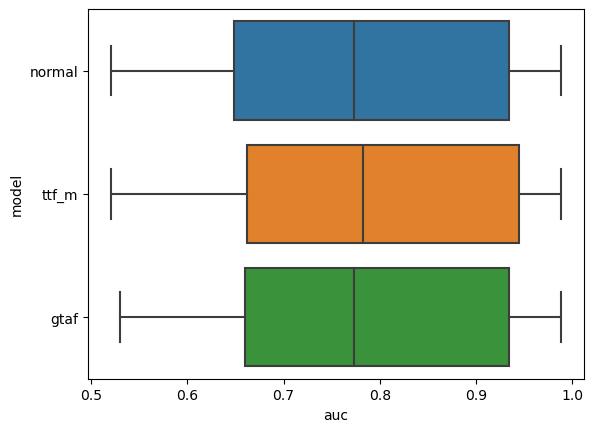

In [11]:
import seaborn as sns

ax = sns.boxplot(
    data=results,
    x='auc',
    y='model',
    orient='h',
)
# sns.boxplot(
#     data=results,
#     x='tst_cubo',
#     y='model',
#     orient='h',
#     ax=ax
# )

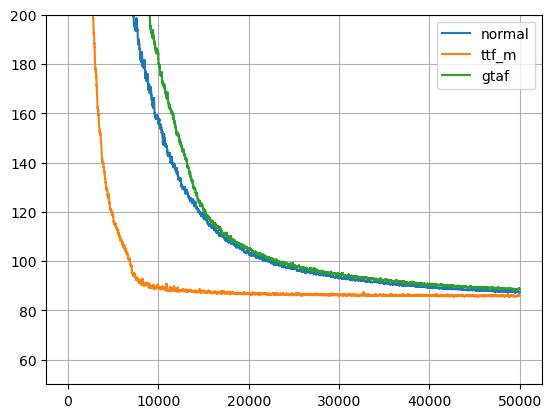

In [7]:
from tailnflows.plot_utils import smooth

losses = load_raw_data(f'{RESULT_PATH}_losses')

for lab in losses:
    plt.plot(*smooth(losses[lab][0]['losses'], 100), label=lab)
plt.legend()
plt.ylim([50, 200])
plt.grid()